In [ ]:
#TASK - 1
import pandas as pd
from scipy.stats import skew, kurtosis

# Load Titanic dataset
file_path = "/content/drive/MyDrive/Titanic.xlsx"
data = pd.read_excel(file_path)
df = pd.DataFrame(data)

# 1. Mean age
print("Mean Age:", df['Age'].mean())

# 2. Median fare
print("Median Fare:", df['Fare'].median())

# 3. Mode embarkation point
print("Most Common Embarkation Point:", df['Embarked'].mode()[0])

# 4. Mean, median, mode of fares by Pclass
grouped = df.groupby('Pclass')['Fare']
print("\nFare Stats by Pclass:")
print("Mean:\n", grouped.mean())
print("Median:\n", grouped.median())
print("Mode:\n", grouped.apply(lambda x: x.mode()[0]))

# 5. Mean and median of SibSp
print("Mean SibSp:", df['SibSp'].mean())
print("Median SibSp:", df['SibSp'].median())

# 6. Skewness of Fare
fare_skew = skew(df['Fare'].dropna())
print("Fare Skewness:", fare_skew)

# 7. Kurtosis of Age
age_kurt = kurtosis(df['Age'].dropna())
print("Age Kurtosis:", age_kurt)

# 8. Skewness of Parch
print("Parch Skewness:", skew(df['Parch'].dropna()))

# 9. Skewness and Kurtosis of Survived
print("Survived Skewness:", skew(df['Survived'].dropna()))
print("Survived Kurtosis:", kurtosis(df['Survived'].dropna()))

# 10. Compare Skewness & Kurtosis: Fare vs Age
print("Fare Skew:", fare_skew, "| Age Skew:", skew(df['Age'].dropna()))
print("Fare Kurtosis:", kurtosis(df['Fare'].dropna()), "| Age Kurtosis:", age_kurt)



Mean Age: 29.69911764705882
Median Fare: 14.4542
Most Common Embarkation Point: S

Fare Stats by Pclass:
Mean:
 Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
Median:
 Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64
Mode:
 Pclass
1    26.55
2    13.00
3     8.05
Name: Fare, dtype: float64
Mean SibSp: 0.5230078563411896
Median SibSp: 0.0
Fare Skewness: 4.7792532923723545
Age Kurtosis: 0.16863657224286044
Parch Skewness: 2.7444867379203735
Survived Skewness: 0.4777174662568536
Survived Kurtosis: -1.7717860224331319
Fare Skew: 4.7792532923723545 | Age Skew: 0.3882898514698657
Fare Kurtosis: 33.20428925264474 | Age Kurtosis: 0.16863657224286044


In [6]:
#Task-2
import numpy as np
import pandas as pd

# Step 1: Create lists
Exp = [1, 2, 3, 4, 5]
Salary = [1000, 2500, 4000, 5000, 7000]

# Step 2: Compute mean and std
mean_exp = np.mean(Exp)
std_exp = np.std(Exp)
standardized_exp = [(x - mean_exp)/std_exp for x in Exp]

mean_salary = np.mean(Salary)
std_salary = np.std(Salary)
standardized_salary = [(x - mean_salary)/std_salary for x in Salary]

# Step 5: Create DataFrame
df = pd.DataFrame([Exp, Salary, standardized_exp, standardized_salary],
                  index=['Exp', 'Salary', 'Std_Exp', 'Std_Salary'])
print(df)

# Step 6: Verify standardization
print("Mean Std_Exp:", np.mean(standardized_exp))
print("Std Dev Std_Exp:", np.std(standardized_exp))
print("Mean Std_Salary:", np.mean(standardized_salary))
print("Std Dev Std_Salary:", np.std(standardized_salary))


                      0            1            2            3            4
Exp            1.000000     2.000000     3.000000     4.000000     5.000000
Salary      1000.000000  2500.000000  4000.000000  5000.000000  7000.000000
Std_Exp       -1.414214    -0.707107     0.000000     0.707107     1.414214
Std_Salary    -1.408365    -0.679900     0.048564     0.534207     1.505493
Mean Std_Exp: 0.0
Std Dev Std_Exp: 0.9999999999999999
Mean Std_Salary: 0.0
Std Dev Std_Salary: 1.0


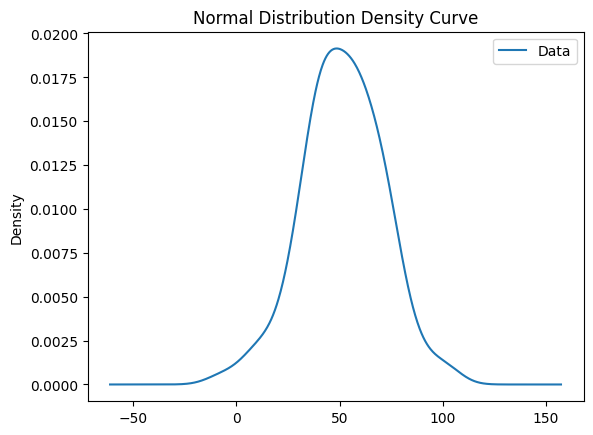

Mean: 51.63330574548393
Median: 51.65372689360487


In [7]:
#Task-3
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Generate data
data = stats.norm.rvs(loc=50, scale=20, size=100)

# Step 3: Convert to DataFrame
df = pd.DataFrame(data, columns=['Data'])

# Step 4: Density plot
df.plot.density(title="Normal Distribution Density Curve")
plt.show()

# Step 5: Mean & Median
print("Mean:", df['Data'].mean())
print("Median:", df['Data'].median())



In [8]:
#Task-4
from scipy.stats import norm

# Q1 – Z-test for population mean
pop_mean = 168
sample_mean = 169.5
pop_std = 3.9
n = 36

z = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
z_critical = norm.ppf(0.975)

print("Z Score:", z)
print("Z Critical (95%):", z_critical)

if abs(z) > z_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

# Q2 – Confidence Intervals
sample_mean = 32
pop_std = 5.6
n = 40

for confidence in [0.80, 0.90, 0.98]:
    z_crit = norm.ppf((1 + confidence) / 2)
    margin = z_crit * (pop_std / np.sqrt(n))
    lower = sample_mean - margin
    upper = sample_mean + margin
    print(f"{int(confidence*100)}% CI: ({lower:.2f}, {upper:.2f}) | Z-Critical: {z_crit:.3f}")


Z Score: 2.3076923076923075
Z Critical (95%): 1.959963984540054
Reject Null Hypothesis
80% CI: (30.87, 33.13) | Z-Critical: 1.282
90% CI: (30.54, 33.46) | Z-Critical: 1.645
98% CI: (29.94, 34.06) | Z-Critical: 2.326


In [9]:
#Task-5
from scipy.stats import t, ttest_1samp

# Q1 – Medication and IQ
sample_mean = 140
pop_mean = 100
sample_std = 20
n = 30
dfree = n - 1
alpha = 0.05

t_stat = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))
t_critical = t.ppf(1 - alpha/2, dfree)

print("T Statistic:", t_stat)
print("T Critical:", t_critical)

if abs(t_stat) > t_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

# Using t-test function
data = np.random.normal(loc=140, scale=20, size=30)
t_stat_func, p_val = ttest_1samp(data, 100)
print("\nT-Test Function Result - t:", t_stat_func, ", p:", p_val)

# Q2 – Confidence interval
sample_mean = 20
sample_std = 3.5
n = 15
dfree = n - 1
t_critical = t.ppf(0.975, dfree)
margin = t_critical * (sample_std / np.sqrt(n))
lower = sample_mean - margin
upper = sample_mean + margin

print("95% CI:", (lower, upper))
print("T Critical (95%):", t_critical)


T Statistic: 10.954451150103322
T Critical: 2.045229642132703
Reject Null Hypothesis

T-Test Function Result - t: 11.55729750923357 , p: 2.245489813960751e-12
95% CI: (np.float64(18.061764604523756), np.float64(21.938235395476244))
T Critical (95%): 2.1447866879169273
